(u'panss_n1', [108])
(u'panss_n3', [584])
(u'panss_g8', [114])


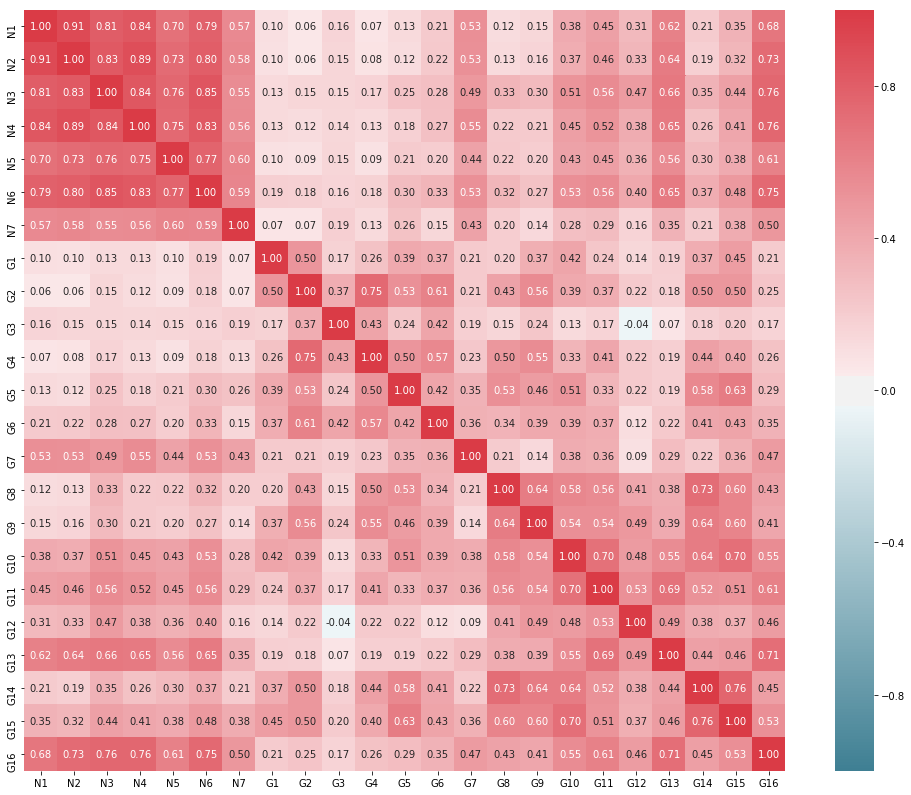

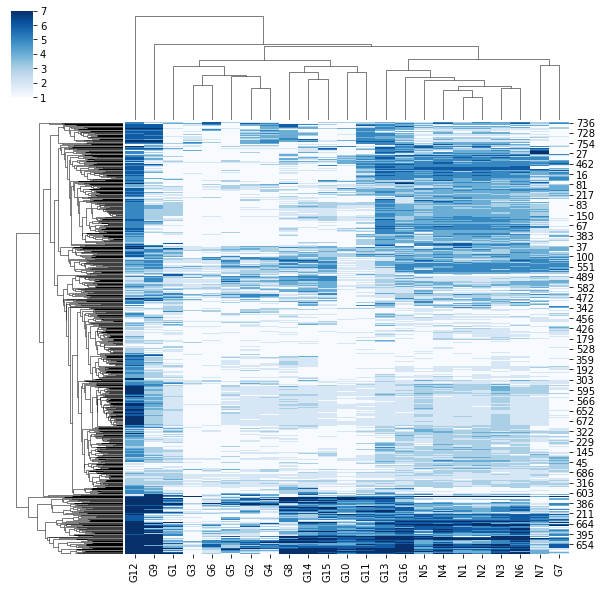

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

panss_n_g = pd.read_excel('panss_n_g.xlsx')


#数据全部转换为float64
panss_n_g = panss_n_g.astype('float64')

#定位缺失值
for columname in panss_n_g.columns:
    if panss_n_g[columname].count() != len(panss_n_g):
        loc = panss_n_g[columname][panss_n_g[columname].isnull().values==True].index.tolist()
        print(columname, loc)

#以中位数替换缺失值
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy = 'median', axis=0)
imp.fit(panss_n_g)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)
panss_n_g_imputed = imp.transform(panss_n_g)

panss_n_g_imputed = pd.DataFrame(panss_n_g_imputed, columns=['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16'])

'''
#标准化数据进行后续操作
panss_n_g_imputed_standardized = pd.DataFrame(preprocessing.scale(panss_n_g_imputed), columns=panss_n_g.columns)
'''

#Pearson's correlation coefficient matrix
corr = panss_n_g_imputed.corr()
corr.to_csv('panss_n_g_correlation.csv')
plt.figure(figsize=(18,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1,  annot=True, square=True, fmt='.2f', cmap = cmap)
plt.savefig('panss_n_g_correlation.png', dpi=300)

#clustermap
sns.clustermap(data=panss_n_g_imputed
               , cmap='Blues', row_cluster=True)
plt.savefig('panss_n_g_cluster.png', dpi=300)

